In [1]:
import numpy as np
from PIL import Image
import diagonal_crop
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline
import os #pour créer des dossiers


In [2]:
from keras import layers
from keras import models
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image


Using TensorFlow backend.


In [3]:
from keras.models import load_model
model=load_model('grasping_vgg16_1(1).h5')

Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead


C:\Users\Admin\Anaconda3\lib\site-packages\keras\models.py:288: UserWarning: Error in loading the saved optimizer state. As a result, your model is starting with a freshly initialized optimizer.
  warnings.warn('Error in loading the saved optimizer '


(250, 340, 3)


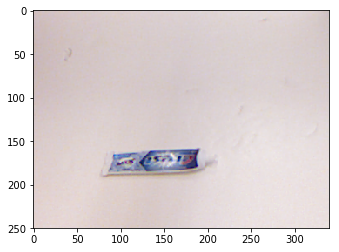

In [4]:
img=Image.open('pcd0181r.png')
img=img.crop((100,130,440,380))
img_array= np.asarray(img)[:,:,:3]
img_array
img_array=img_array/255
print(img_array.shape)
plt.imshow(img)
plt.show()

In [5]:
from sklearn.feature_extraction import image
#patches_img=image.extract_patches(img_array,patch_shape=(150,150,3),extraction_step=50)
patches_img=image.extract_patches_2d(img_array, (150,150), max_patches=0.01, random_state=None)
print(patches_img.shape)

(192, 150, 150, 3)


In [6]:
first_patch=patches_img[:]
#first_patch = first_patch.reshape((1,) + first_patch.shape)
print(first_patch.shape)

(192, 150, 150, 3)


In [7]:
L=len(first_patch)
prediction_first_patch=[]
potential_grasps=[]
for i in range(L):
    x=first_patch[i]
    resized_patch=np.resize(x,(1,150,150,3))
    prediction=model.predict(resized_patch)
    prediction_first_patch.append(float(prediction))
    if float(prediction) < 0.3:
        potential_grasps.append(first_patch[i])
    #print(prediction)
print(prediction_first_patch)

[0.8619986772537231, 0.9493581056594849, 0.9375184774398804, 0.9329608082771301, 0.9217433929443359, 0.7260769605636597, 0.9435904622077942, 0.9480250477790833, 0.9442790746688843, 0.8437628746032715, 0.8445873260498047, 0.8545982241630554, 0.8732202649116516, 0.9716805815696716, 0.8295543789863586, 0.9814438819885254, 0.9334295392036438, 0.9673448801040649, 0.9601464867591858, 0.5915018320083618, 0.9634419083595276, 0.9806644916534424, 0.8507803082466125, 0.9564493894577026, 0.8430160880088806, 0.6099193096160889, 0.6920825242996216, 0.8400191068649292, 0.9303712844848633, 0.8874324560165405, 0.8343711495399475, 0.757710337638855, 0.8979336023330688, 0.8871651887893677, 0.5308757424354553, 0.5864791870117188, 0.8913105726242065, 0.8900230526924133, 0.8947207927703857, 0.8499085903167725, 0.9543396234512329, 0.971310555934906, 0.9754527807235718, 0.9651036858558655, 0.8961313962936401, 0.9898537993431091, 0.9083939790725708, 0.843927800655365, 0.847721517086029, 0.8792406916618347, 0.9

In [8]:
np.shape(potential_grasps)

(1, 150, 150, 3)

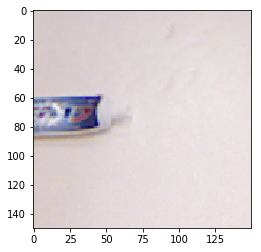

In [10]:
plt.imshow(potential_grasps[0])

Nombre de rectangles traités: 192
Proba minimale: 0.2608988285064697
Index correspondant: 185


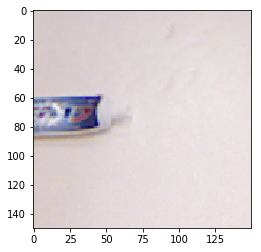

In [15]:
import operator
print("Nombre de rectangles traités:",len(prediction_first_patch))
min_index, min_value = min(enumerate(prediction_first_patch), key=operator.itemgetter(1))
print("Proba minimale:",min_value)
print("Index correspondant:",min_index)
plt.imshow(first_patch[min_index])